# 🧍‍♂️🧍‍♀️ Customer Behavior Analysis

## 🎯 Objectives

This notebook explores customer behavior patterns in the e-commerce dataset. The main goals are to:

- Identify who spends more: men or women.
- Analyze which age groups spend or buy the most.
- Explore buying frequency and recency.
- Examine product category preferences by gender and age.
- Understand regional buying patterns.
- Assess if shipping outcomes impact customer behavior.

## 📦 Data Source


The data used here is the cleaned version of the original sales dataset:
- File: `../data/cleaned_orders.csv`
- Format: CSV
- Rows represent individual product orders with associated customer and order details.

## 📊 Data Loading

In [9]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Load data
df = pd.read_csv("../data/cleaned_orders.csv")
df.shape
# df.info()

(810, 18)

In [7]:
# Check for nulls
# df.isna().sum()

## Analysis

In this section, different aspects of the data would be considered, showcasing orders and revenues are affected by customer behaviour, demographics, as well as shipping prices.

### 📊 1. Spending Patterns by Gender

Text(0, 0.5, 'Total Amount Spent GHS')

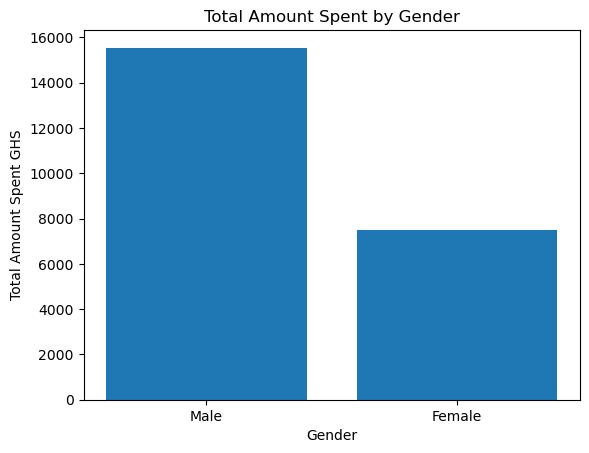

In [15]:
# Graph of total amount calc vs gender
plt.bar(df["Gender"],df["Total Price Calc"])
plt.title("Total Amount Spent by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount Spent GHS")

It appears `Male`s spend almost twice as much as `Female`s. We would delve deeper into each ``Gender`` and drill down detailed information.

#### Spendings By Gender deep dive - Male

##### Male Spending by Categories

Text(0, 0.5, 'Category')

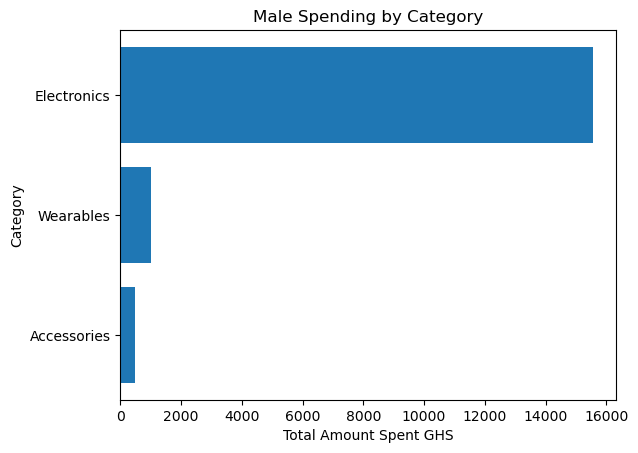

In [24]:
# Obtain male information
df_male = df[df["Gender"] == "Male"]
# Visualize Male Spending by Product Categories
plt.barh(df_male["Category"], df_male["Total Price Calc"]);
plt.title("Male Spending by Category")
plt.xlabel("Total Amount Spent GHS")
plt.ylabel("Category")

### 📊 2. Spending Patterns by Age Group

### 📊 3. Category Preferences by Gender & Age

### 📊 4. Frequency & Recency

### 📊 5. Region-Based Insights

### 📊 6. Shipping Status vs Customer Spend

## 📌Summary of Insights

## 📝 Usage Information

This notebook is open for educational and non-commercial use.
Feel free to reuse, modify, or reference this work as part of your learning or projects.